# Instructions

This notebook contains several exercises to practice regularization.  Each network below contains instructions to practice regularization.

In [ ]:
%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV



**bold text**# Exercise 2

Let's see how well you can improve boston housing test MAE using only a subset of the data.

In [ ]:

# Hypertuning:
# the best parameter according to hypertuning is : batch size = 20, epoch = 60. 


(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

np.random.seed(0)
index = np.arange(len(x_train))

# Take a biased training set - top 50 house prices
index = sorted(index, key=lambda x: -y_train[x])
x_train = x_train[index]
y_train = y_train[index]

sample = 50
x_train, y_train = x_train[:sample], y_train[:sample]
x_test, y_test = x_test, y_test

scalar = StandardScaler()
x_train2 = scalar.fit_transform(x_train)
x_test2 = scalar.transform(x_test)

print("Training Dataset Size: ", x_train2.shape)
print("Training Labels Size: ", y_train.shape)
print("Testing Dataset Size: ", x_test2.shape)
print("Testing Labels Size: ", y_test.shape)

Training Dataset Size:  (50, 13)
Training Labels Size:  (50,)
Testing Dataset Size:  (102, 13)
Testing Labels Size:  (102,)


In [ ]:
# /***************************************************************************************
# *    Title: How to Grid Search Hyperparameters for Deep Learning Models in Python With Keras
# *    Author:  Jason Brownlee
# *    Date: 2016-08-09
# *    Code version: N.A.
# *    Availability: <https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/>
# *
# ***************************************************************************************/
import numpy

def createModel(neurons = 1, dropout_rate = 0.2):
  model1 = Sequential()
  model1.add(Dense(neurons, activation='relu',input_shape=(13,)))
  # model1.add(Dense(neurons, activation='relu'))
  model1.add(Dense(neurons, activation='relu'))
  model1.add(Dense(1,))
  #model1.compile(loss='mae', optimizer=Adam(lr=0.01), metrics=['accuracy'])
  model1.compile(loss='mae', optimizer=Adam(lr=0.01))
  return model1


print('a')
seed = 7
numpy.random.seed(seed)
model = KerasRegressor(build_fn=createModel, verbose=1)

batch_size = [20, 40, 60]
epochs = [20, 30]
neurons =  [15]
param_grid = dict(batch_size=batch_size, epochs=epochs, neurons = neurons)
print("d")
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

print('c')
grid_result = grid.fit(x_test2, y_test)


print('b')

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

a
d
c
Epoch 1/20
68/68 [==============================] - 13s 195ms/step - loss: 23.8844
Epoch 2/20
68/68 [==============================] - 0s 431us/step - loss: 21.8213
Epoch 3/20
68/68 [==============================] - 0s 417us/step - loss: 19.9204
Epoch 4/20
68/68 [==============================] - 0s 393us/step - loss: 18.2978
Epoch 5/20
68/68 [==============================] - 0s 442us/step - loss: 16.7801
Epoch 6/20
68/68 [==============================] - 0s 449us/step - loss: 15.6263
Epoch 7/20
68/68 [==============================] - 0s 415us/step - loss: 14.3433
Epoch 8/20
68/68 [==============================] - 0s 476us/step - loss: 12.9209
Epoch 9/20
68/68 [==============================] - 0s 490us/step - loss: 11.9083
Epoch 10/20
68/68 [==============================] - 0s 458us/step - loss: 11.2685
Epoch 11/20
68/68 [==============================] - 0s 500us/step - loss: 10.8061
Epoch 12/20
68/68 [==============================] - 0s 422us/step - loss: 10.2770
Epoch 

KeyboardInterrupt: ignored

In [ ]:
model2 = Sequential()

model2.add(Dropout(myPct[i], input_shape=(1,)))
model2.add(Dense(15, activation="relu"))
model2.add(Dense(1))

model2.summary()

model2.compile(loss='mae', optimizer=Adam(lr=0.01))
model2.evaluate(x_test2, y_test)

## Drop Out Input Layer


Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_725 (Dense)            (None, 15)                210       
_________________________________________________________________
dense_726 (Dense)            (None, 1)                 16        
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________
102/102 [==============================] - 0s 207us/step
[20.72174779106589]
Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_727 (Dense)  

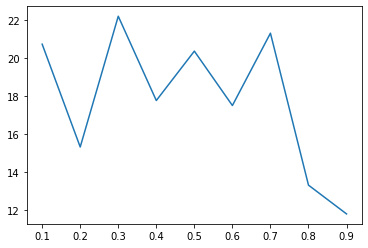

In [ ]:
# Improve Variance by adding a drop-out layer.

from keras import regularizers

loss = []
import numpy

myPct = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range(0, len(myPct)):
  


    model33 = Sequential()

    model33.add(Dropout(myPct[i], input_shape=(13,)))
    model33.add(Dense(15, activation="relu"))
    model33.add(Dense(1))

    model33.summary()

    model33.compile(loss='mae', optimizer=Adam(lr=0.01))
    callbacks = []
    history = model33.fit(x_train2, y_train, batch_size=20, epochs=60, callbacks=callbacks, verbose=0)

    model33.evaluate(x_test2, y_test)

    myLoss = model33.evaluate(x_test2, y_test)
    loss.append(myLoss)
    print(loss)



print(myPct)
print(loss)

import matplotlib.pyplot as plt 
  
plt.plot(myPct, loss)
print(min(loss))

In [ ]:
print(min(loss))

11.81053907731


# `Drop out Hidden Layer`

In [ ]:
from keras import regularizers

loss = []
import numpy

myPct = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for i in range(0, len(myPct)):
  


    model33 = Sequential()

    model33.add(Dense(15, activation='relu',input_shape=(13,)))

    model33.add(Dense(15, activation="relu"))
    model.add(Dropout(0.2))
    model33.add(Dense(1))

    model33.summary()

    model33.compile(loss='mae', optimizer=Adam(lr=0.01))
    callbacks = []
    history = model3.fit(x_train2, y_train, batch_size=5, epochs=50, callbacks=callbacks, verbose=0)

    model33.evaluate(x_test2, y_test)

    myLoss = model33.evaluate(x_test2, y_test)
    loss.append(myLoss)
    print(loss)



print(myPct)
print(loss)

import matplotlib.pyplot as plt 
  
plt.plot(myPct, loss)

print(min(loss))

## L2 Regularizer 

Model: "sequential_262"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_771 (Dense)            (None, 15)                210       
_________________________________________________________________
dense_772 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_773 (Dense)            (None, 1)                 16        
Total params: 466
Trainable params: 466
Non-trainable params: 0
_________________________________________________________________
102/102 [==============================] - 6s 58ms/step
[24.415749643363206]
Model: "sequential_263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_774 (Dense)            (None, 15)                210       
_________________________________________________________________
dense_775 (Dense)  

ValueError: ignored

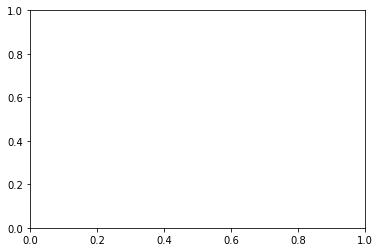

In [ ]:
# Improve Variance by using L2.

from keras import regularizers

loss = []
import numpy

myAlpha = list(numpy.arange(0, 0.1, 0.0005))
myAlpha1 = [ 0.00001,0.0001, 0.001,0.01]

for i in range(0, len(myAlpha1)):

    model22 = Sequential()
    model22.add(Dense(15, activation="relu", input_shape=(13,)))
    myRegularizer1 = regularizers.l2(myAlpha1[i])
    
    model22.add(Dense(15, activation="relu", kernel_regularizer=myRegularizer1 ,bias_regularizer=myRegularizer1 ))
    model22.add(Dense(1))

    model22.summary()

    model22.compile(loss='mae', optimizer=Adam(lr=0.01))
    callbacks = []
    history = model22.fit(x_train2, y_train, batch_size=5, epochs=50, callbacks=callbacks, verbose=0)

    myLoss = model22.evaluate(x_test2, y_test)
    loss.append(myLoss)
    print(loss)



print(myAlpha)
print(loss)

import matplotlib.pyplot as plt 
  
plt.plot(myAlpha, loss)

print(min(loss))


In [ ]:
print(min(loss))

21.313645942538393


## Problem 6

Using the same number of epochs and training set, try to add regularization (any method except changing the training set) to improve the test set accuracy.  Describe the regularization methods you used (including the parameters you tried).  Which methods worked the best?  Why?

In [ ]:
# Source of Code: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

import numpy
from sklearn.model_selection import GridSearchCV

seed = 7
numpy.random.seed(seed)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs, neurons = neurons)
grid = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_test2, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))